# Desafio Parte 1

In [114]:
import networkx as nx
import pandas as pd


graph: nx.Graph  = nx.read_gml("data/GraphMissingEdges.gml")

In [115]:
print(graph.is_directed())
print(nx.is_connected(graph))

False
False


### Grau de cada estabelecimento

In [116]:
for node, degree in sorted(graph.degree(), key=lambda x: x[1], reverse=True):
    print(f"{graph.nodes[node]['name']}: {degree}")


Gaucho Parrilla Argentina: 232
Condado Tacos: 224
Noodlehead: 212
täkō: 204
Bakersfield: 191
Smallman Galley: 183
Meat & Potatoes: 171
DiAnoia's Eatery: 169
Piada Italian Street Food: 157
Banh Mi & Ti: 132
Pork & Beans: 130
Social House Seven: 128
Millie's Homemade Ice Cream: 126
Southern Tier Brewery Pittsburgh: 122
City Works - Pittsburgh: 116
The Porch at Schenley: 111
Altius: 110
The Abbey on Butler Street: 108
Muddy Waters Oyster Bar: 105
Burgh'ers Brewing: 103
Mindful Brewing Company: 102
Pirata: 102
Primanti Bros: 101
Proper Brick Oven & Tap Room: 100
Butcher and the Rye: 99
Church Brew Works: 96
Totopo Mexican Kitchen and Bar: 96
Ki Ramen: 95
Deluca's Diner: 92
Redhawk Coffee: 90
Everyday Noodles: 86
Hofbrauhaus Pittsburgh: 85
Smoke BBQ Taqueria: 84
Primanti Bros: 84
B52 Cafe: 84
Naturoll Creamery: 83
Sienna Mercato: 83
Istanbul Sofra: 83
The Milk Shake Factory: 82
Senyai Thai Kitchen: 81
Eleven: 81
Kaya: 79
Fat Heads Saloon: 77
Tres Rios: 77
Umami: 77
Pittsburgh Poke: 77
Ten P

### Grau médio por categoria

As categorias com maior grau médio são referentes a serviços voltados para o lazer como restaurantes, bares, casas noturnas, etc. já os com menor grau são de serviços específicos como parteiras, decoração, astrólogos, etc.

In [117]:
categories = pd.read_csv("data/categories.csv").to_dict()["names"]

data = {}
for node, degree in sorted(graph.degree(), key=lambda x: x[1], reverse=True):
    node_categories = graph.nodes[node]['categories'].split(",")
    for nc in node_categories:
        if not nc:
            continue

        if data.get(categories[int(nc)]):
            data[categories[int(nc)]] += degree
        else:
            data[categories[int(nc)]] = degree
for category, degree in sorted(data.items(), key=lambda x: x[1], reverse=True):
    print(f"Categoria {category}: {degree}")

Categoria Restaurants: 27716
Categoria Food: 12246
Categoria Nightlife: 9595
Categoria Bars: 9308
Categoria American (New): 6145
Categoria American (Traditional): 5104
Categoria Sandwiches: 3756
Categoria Breakfast & Brunch: 3506
Categoria Coffee & Tea: 3218
Categoria Pizza: 3112
Categoria Italian: 2705
Categoria Cocktail Bars: 2633
Categoria Seafood: 2543
Categoria Event Planning & Services: 2512
Categoria Mexican: 2341
Categoria Burgers: 2317
Categoria Shopping: 2143
Categoria Desserts: 2112
Categoria Salad: 1883
Categoria Cafes: 1607
Categoria Beauty & Spas: 1544
Categoria Sushi Bars: 1522
Categoria Japanese: 1513
Categoria Specialty Food: 1487
Categoria Thai: 1468
Categoria Arts & Entertainment: 1355
Categoria Chinese: 1342
Categoria Pubs: 1272
Categoria Diners: 1263
Categoria BeerWineSpirits: 1125
Categoria Bakeries: 1079
Categoria Steakhouses: 1069
Categoria Caterers: 1069
Categoria Ice Cream & Frozen Yogurt: 1050
Categoria Breweries: 1042
Categoria Vegetarian: 1034
Categoria Bee

É preciso notar que a maioria dos estabelecimentos do dataset são relacionados a lugares de lazer, como é o caso de restaurantes, então fica mais claro o porque dos nós com maior grau serem dessas categorias

In [118]:
data = {}
for node in graph.nodes():
    node_categories = graph.nodes()[node]['categories'].split(",")
    for nc in node_categories:
        if not nc:
            continue

        if data.get(categories[int(nc)]):
            data[categories[int(nc)]] += 1
        else:
            data[categories[int(nc)]] = 1
for category, quantity in sorted(data.items(), key=lambda x: x[1], reverse=True):
    print(f"Total de estabelecimentos com a categoria {category}: {quantity}")


Total de estabelecimentos com a categoria Restaurants: 1681
Total de estabelecimentos com a categoria Food: 907
Total de estabelecimentos com a categoria Shopping: 731
Total de estabelecimentos com a categoria Nightlife: 504
Total de estabelecimentos com a categoria Bars: 467
Total de estabelecimentos com a categoria Beauty & Spas: 404
Total de estabelecimentos com a categoria Home Services: 364
Total de estabelecimentos com a categoria Event Planning & Services: 298
Total de estabelecimentos com a categoria Sandwiches: 290
Total de estabelecimentos com a categoria American (Traditional): 286
Total de estabelecimentos com a categoria Local Services: 283
Total de estabelecimentos com a categoria Pizza: 282
Total de estabelecimentos com a categoria Automotive: 276
Total de estabelecimentos com a categoria Health & Medical: 267
Total de estabelecimentos com a categoria American (New): 243
Total de estabelecimentos com a categoria Coffee & Tea: 226
Total de estabelecimentos com a categoria

Como a maioria dos estabelecimentos sendo restaurantes mostra a tendência que essa rede de avaliação seja mais efetiva em lugares de lazer e não se mostra muito promissora em ter pessoas avaliando um consultorio médico ou escolas de dança, por exemplo.

### Histograma

Pelo histograma notamos que a maioria dos nós não tiveram interações com outros estabelecimentos

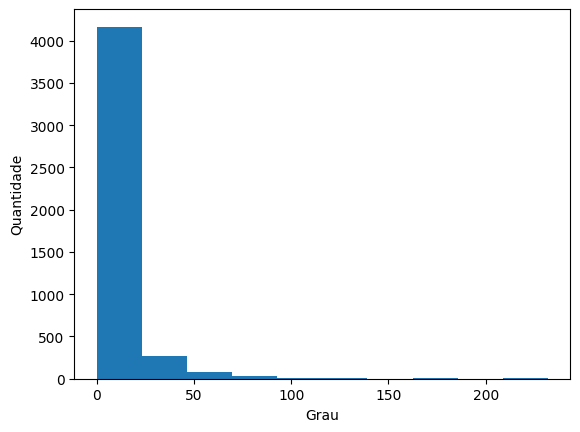

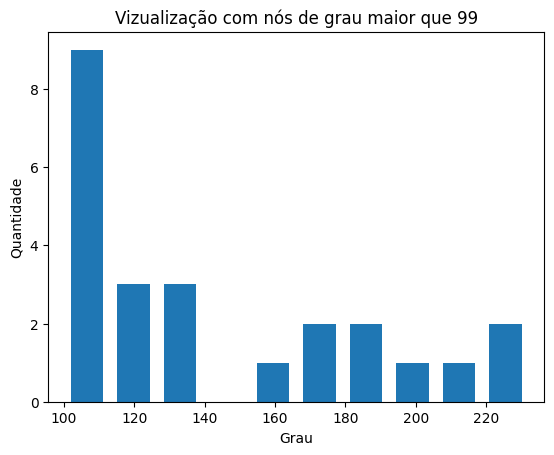

In [119]:
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)

plt.ylabel("Quantidade")
plt.xlabel("Grau")
plt.hist(degree_sequence)
plt.show()

# remove nós com grau menor que 99 para uma melhor vizualização dos com maior grau
degree_sequence = [d for d in degree_sequence if d >= 100]

plt.title("Vizualização com nós de grau maior que 99")
plt.ylabel("Quantidade")
plt.xlabel("Grau")
plt.hist(degree_sequence, rwidth=0.7)
plt.show()


### Coeficiente de clusterização da rede

In [120]:
print(nx.average_clustering(graph))


0.04489358044799767


### Coeficiente de clusterização por nó

Alguns nós tem um coeficiente alto (igual a 1) e isso indica que eles são importantes na rede mostrando que todos os seus vizinhos estão conectados e com base na nossa rede mostra que todas as pessoas que visitaram esses lugares também passaram por outros por indicação dos usuários.

In [121]:
for node, coefficient in sorted(nx.clustering(graph).items(), key=lambda x: x[1], reverse=True):
    print(f"[{node}] - {graph.nodes()[node]['name']}: {coefficient}")


[N7IWzVy-2t8qDKLLk81jXw] - Shadyside Hideaway Bar: 1.0
[_Igbl0NYiXvyzab-o5TBsQ] - Point Breeze Veterinary Clinic: 1.0
[mdKSq2mfp1M8tfbjmbyv4Q] - Loafers Bread Co: 1.0
[-k80VNg0yqYQakKZILwViQ] - Subway: 1.0
[Lk7qMIfW-w43sWSXsuf7ZA] - Panther Hollow Trail: 1.0
[q9FifZsp6jno13xnby1XnA] - Clothes Minded: 1.0
[karHccB7gWzj5ZTWSCg1Pw] - Washington Blvd Automotive: 1.0
[H5vlbkJ_8mFI1wCGHO3apg] - Villa Italian Kitchen: 1.0
[DBtmJXpwS31E0cDZo7ypGw] - Chop Wok & Talk: 1.0
[huYQUAVhZq3dm-JfI8q_rQ] - Sport Clips Haircuts of North Hills: 1.0
[tczCMEtm1-9qNrphMAjQnA] - Fed-Ex Office: 1.0
[qvKvxTEp7Lg1fDB6yDoJBg] - Crane Village: 1.0
[EY6o59A7qnlr1LxWpzdkiw] - Shults Ford: 1.0
[9GA2gmLV4NX2oJkuz6fdcA] - Garage Door Saloon: 1.0
[B9J-DOy-iXp0C32tWar7EA] - Bow Wow Doggie Daycare: 1.0
[Q5ZxzCAWf4kOVDrvVGRKrw] - Budget: 1.0
[ugmQx75KCr8nc8E-d69K8g] - Marketplace Cafe: 1.0
[eQS4GqUh-D4Si-ERVa5IQw] - Crate & Barrel: 1.0
[coo8SbhOO8RtPKznMwwTMw] - Toys R Us: 1.0
[T6qMxypoF9rrI4XG2enlWA] - Franklin West: 1.0


In [122]:
from geopy.distance import distance

node_anterior = None
distancia_total = 0
for node, centrality in sorted(nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[:50]:
    if node_anterior is None:
        node_anterior = node
        continue
    node1 = graph.nodes()[node]
    node2 = graph.nodes()[node_anterior]
    distancia_km = distance((node1["latitude"], node1["longitude"]), (node2["latitude"], node2["longitude"])).km
    print(f"A distancia entre {node1['name']} e {node2['name']} é {distancia_km}")
    node_anterior = node
    distancia_total += distancia_km
print(distancia_total/50)

A distancia entre Condado Tacos e Gaucho Parrilla Argentina é 0.8856114157797238
A distancia entre Noodlehead e Condado Tacos é 6.13668100064316
A distancia entre täkō e Noodlehead é 6.7137052511520245
A distancia entre Bakersfield e täkō é 0.4978040081611562
A distancia entre Smallman Galley e Bakersfield é 1.416866182932096
A distancia entre Meat & Potatoes e Smallman Galley é 1.7820685169150106
A distancia entre DiAnoia's Eatery e Meat & Potatoes é 2.3087951052388123
A distancia entre Piada Italian Street Food e DiAnoia's Eatery é 2.3810684398100523
A distancia entre City Works - Pittsburgh e Piada Italian Street Food é 3.8478535503066476
A distancia entre Banh Mi & Ti e City Works - Pittsburgh é 5.152484961269743
A distancia entre Pork & Beans e Banh Mi & Ti é 4.907055096530851
A distancia entre Southern Tier Brewery Pittsburgh e Pork & Beans é 0.7701916528584266
A distancia entre Social House Seven e Southern Tier Brewery Pittsburgh é 0.8918002168352197
A distancia entre Mindful B

In [123]:
from geopy.distance import distance

node_anterior = None
distancia_total = 0
for node, centrality in sorted(nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[-50:]:
    if node_anterior is None:
        node_anterior = node
        continue
    node1 = graph.nodes()[node]
    node2 = graph.nodes()[node_anterior]
    distancia_km = distance((node1["latitude"], node1["longitude"]), (node2["latitude"], node2["longitude"])).km
    print(f"A distancia entre {node1['name']} e {node2['name']} é {distancia_km}")
    node_anterior = node
    distancia_total += distancia_km
print(distancia_total/50)

A distancia entre Visionworks e Wise County Biscuits é 11.961913753398536
A distancia entre Smile Direct Club e Visionworks é 13.83159395334422
A distancia entre Monro Muffler Brake & Service e Smile Direct Club é 8.578480654079149
A distancia entre Forbes Management e Monro Muffler Brake & Service é 12.18535529622896
A distancia entre Dunkin' Donuts e Forbes Management é 6.930813012806347
A distancia entre East End Landscaping e Dunkin' Donuts é 11.645624257512257
A distancia entre Phoenix Chinese SPA e East End Landscaping é 8.742057573920325
A distancia entre 17th Street Cafe e Phoenix Chinese SPA é 4.969852127952339
A distancia entre Concentra Medical Center e 17th Street Cafe é 2.9578202690707047
A distancia entre Tony Williams Car Service e Concentra Medical Center é 2.5215526077042383
A distancia entre Wpxi Tv Channel 11 e Tony Williams Car Service é 3.120495711662049
A distancia entre Monro Muffler Brake & Service e Wpxi Tv Channel 11 é 14.486376349123086
A distancia entre Banf

Usando a centralidade de intermediação vemos que os que tem centralidade mais alta estão em uma distancia em kilometros de 4.5 e os que tem a centralidade mais baixa a distãncia aumenta para uma média de 11.7 kilometros.

In [124]:
from geopy.distance import distance

node_anterior = None
distancia_total = 0
for node, centrality in sorted(nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[:50]:
    if node_anterior is None:
        node_anterior = node
        continue
    node1 = graph.nodes()[node]
    node2 = graph.nodes()[node_anterior]
    distancia_km = distance((node1["latitude"], node1["longitude"]), (node2["latitude"], node2["longitude"])).km
    print(f"A distancia entre {node1['name']} e {node2['name']} é {distancia_km}")
    node_anterior = node
    distancia_total += distancia_km
print(distancia_total/50)

A distancia entre täkō e Gaucho Parrilla Argentina é 1.4378529588170532
A distancia entre Condado Tacos e täkō é 0.578177246476974
A distancia entre Smallman Galley e Condado Tacos é 1.359897431463414
A distancia entre Bakersfield e Smallman Galley é 1.416866182932096
A distancia entre Noodlehead e Bakersfield é 6.222943175317961
A distancia entre Meat & Potatoes e Noodlehead é 6.615802438568533
A distancia entre DiAnoia's Eatery e Meat & Potatoes é 2.3087951052388123
A distancia entre Pork & Beans e DiAnoia's Eatery é 2.4111649154393624
A distancia entre Piada Italian Street Food e Pork & Beans é 3.7891620252172333
A distancia entre Southern Tier Brewery Pittsburgh e Piada Italian Street Food é 4.5006098479640295
A distancia entre Social House Seven e Southern Tier Brewery Pittsburgh é 0.8918002168352197
A distancia entre Pirata e Social House Seven é 0.4377405541708222
A distancia entre Banh Mi & Ti e Pirata é 5.061272393133137
A distancia entre Altius e Banh Mi & Ti é 6.334686025299

In [125]:
from geopy.distance import distance

node_anterior = None
distancia_total = 0
for node, centrality in sorted(nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[-50:]:
    if node_anterior is None:
        node_anterior = node
        continue
    node1 = graph.nodes()[node]
    node2 = graph.nodes()[node_anterior]
    distancia_km = distance((node1["latitude"], node1["longitude"]), (node2["latitude"], node2["longitude"])).km
    print(f"A distancia entre {node1['name']} e {node2['name']} é {distancia_km}")
    node_anterior = node
    distancia_total += distancia_km
print(distancia_total/50)

A distancia entre Ryer Martial Arts Academy e Dave's Towing é 12.565047247471737
A distancia entre Amazing Yoga e Ryer Martial Arts Academy é 0.6036115526747037
A distancia entre Manning Physical Therapy and Sports Medicine e Amazing Yoga é 11.384650574589294
A distancia entre Jgg Electronics & Appliances e Manning Physical Therapy and Sports Medicine é 15.000383099165695
A distancia entre Pittsburgh Auto Transport e Jgg Electronics & Appliances é 9.2130518017177
A distancia entre J & M Belize Travel e Pittsburgh Auto Transport é 6.4845364067867886
A distancia entre Walten Point Productions & Barnes Limo e J & M Belize Travel é 0.6189558529590331
A distancia entre Regis Salon e Walten Point Productions & Barnes Limo é 15.604939298516186
A distancia entre Mecka Fitness e Regis Salon é 4.8760390125321535
A distancia entre Arhaus e Mecka Fitness é 12.850668583639141
A distancia entre Lowe's Home Improvement e Arhaus é 15.08501783951419
A distancia entre Goodyear Auto Service Center e Lowe

Usando a centralidade de proximidade vemos que os que tem centralidade mais alta estão em uma distancia em kilometros de 3.8 e os que tem a centralidade mais baixa a distância aumenta para uma média de 11.9 kilometros.

Com os dados geoespaciais conseguimos ver que os nós com mais visitas/reviews estão mais próximos geograficamente o que mostra que a distância facilita um usuário ir em mais de um estabelecimento e quanto mais distante ele está menos provável é que o estabelecimento tenha avaliações na plataforma.

## Conclusão
Olhando do ponto de vista dos dados e caminhos analisados acima conseguimos notar que a rede de reviews tem um pontos mais fortes em uma região com estabelecimentos próximos o que geograficamente faz sentido, pois as pessoas conseguem ir de um ponto a outro com mais facilidade. É possível com mais dados (de outras redes talvez) criar uma análise mais rica desses dados como, por exemplo, o que faz esse parâmetro de distância gegrafica fazer tanto sentido (redes de ônibus, metrô, ciclovias, etc.). Também conseguimos concluir que a rede é muito voltada para estabelecimentos de lazer e os que fogem desse parâmetro tem um peso muito baixo (o grau é baixo e a quantidade de nós também) mostrando que as pessoas tem uma tendência maior ao avaliar determinados tipos de lugares que outros ou como a rede pode ter sido contruída tendeu mais para essas categorias.